In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid', 'navy', 'brown'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Helvetica'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelpad'] = 10.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
#mpl.rcParams['figure.figsize'] = 10, 6

# Save details
# mpl.rcParams['savefig.bbox'] = 'tight'
# mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams.update({'figure.autolayout': False})

import math
from scipy.special import sph_harm_y
from scipy.special import gamma

In [44]:
mcload = np.loadtxt("../test_store/Regge_Eg__tau_1e7_.dat")
mcload2 = np.loadtxt("../test_store/Regge_Eg__tau_1e10_.dat")

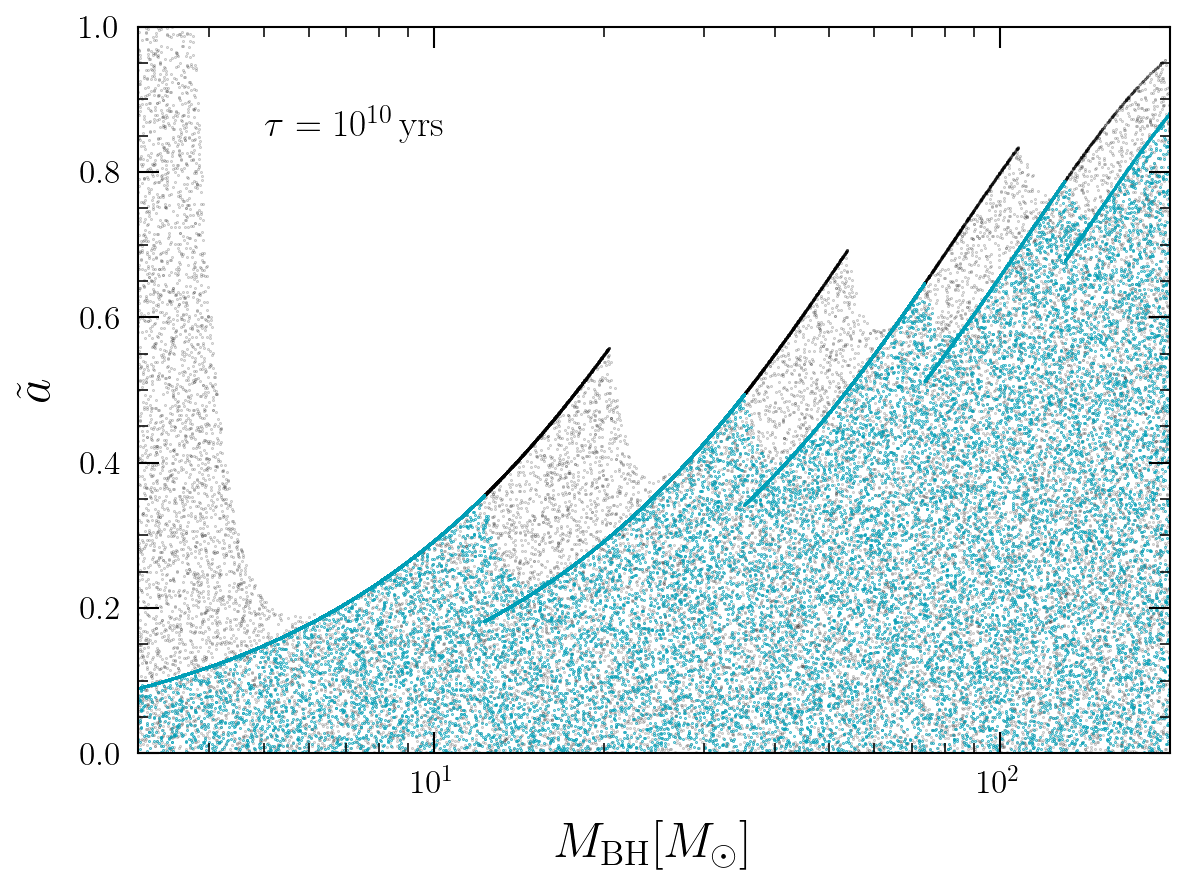

In [46]:
plt.figure(figsize=(8, 6), dpi=150)

plt.scatter(mcload[:,0], mcload[:,1], s=0.1, color="k", alpha=0.3)
plt.scatter(mcload2[:,0], mcload2[:,1], s=0.1, color="#009FB7")

plt.xlim([3,200])
plt.ylim([0,1])
plt.xscale("log")
plt.xlabel(r"$M _{\rm BH}  [M_\odot]$")
plt.ylabel(r"$\tilde{a}$")
plt.text( 5, 0.85, r"$\tau = 10^{10} \,$yrs", fontsize=18)
plt.tight_layout()
plt.savefig("regge_test2.png")

In [121]:
def rb_rpeak(n, alph):
    a0 = 1/alph**2
    rpeak = 2**n * a0**(3/2) * n * gamma(2+n) / np.sqrt(gamma(2*n))
    return rpeak
    
    

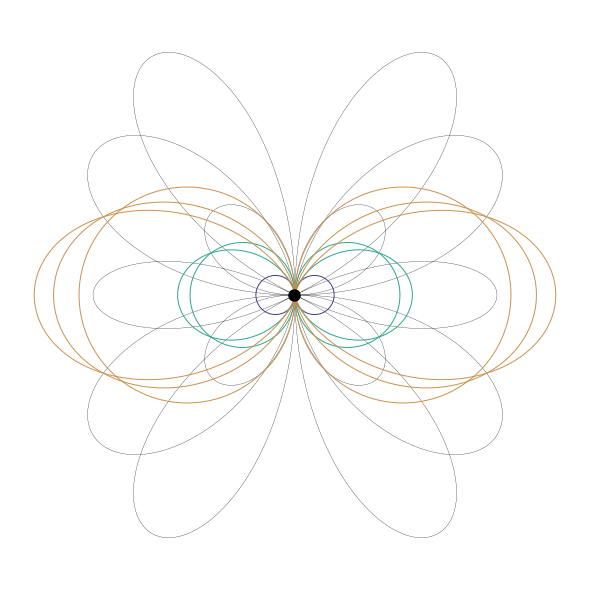

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm

plt.figure(figsize=(6,6))

alph = 0.6

lw=0.2
nlm_list = [(3,2,1),(4,3,1),(4,3,2)]
for i in range(len(nlm_list)):
    n,l,m = nlm_list[i]
    
 
    # grid in theta
    theta = np.linspace(0, np.pi, 500)
    phi = 0.0  # slice at phi = 0
    
    # spherical harmonic values along the slice
    Y_lm = sph_harm_y(l, m, theta, phi)
    r = rb_rpeak(n, alph) * np.abs(Y_lm)
    
    # convert to Cartesian coords in phi=0 plane (x-z plane)
    x = r * np.sin(theta)  # since phi=0 -> cos(phi)=1
    z = r * np.cos(theta)
    
    # plot silhouette
    
    plt.plot(x, z, 'k', linewidth=lw)
    plt.plot(-x, z, 'k', linewidth=lw)  # mirror across y=0 to get full outline



lw=0.7

# nlm_list = [(2,1,1),(3,1,1),(3,2,1),(3,2,2),(4,3,3),(4,1,1),(4,2,2),(4,3,1),(4,3,2),(4,2,1),(5,4,4)]
nlm_list = [(2,1,1),(3,1,1),(3,2,2),(4,3,3),(4,1,1),(4,2,2)]
clist = ["#3D3B8E","#2CA58D","#CB904D"]
for i in range(len(nlm_list)):
    n,l,m = nlm_list[i]
    
 
    # grid in theta
    theta = np.linspace(0, np.pi, 500)
    phi = 0.0  # slice at phi = 0
    
    # spherical harmonic values along the slice
    Y_lm = sph_harm_y(l, m, theta, phi)
    r = rb_rpeak(n, alph) * np.abs(Y_lm)
    
    # convert to Cartesian coords in phi=0 plane (x-z plane)
    x = r * np.sin(theta)  # since phi=0 -> cos(phi)=1
    z = r * np.cos(theta)
    
    # plot silhouette
    if n == 2:
        ccl = clist[0]
    elif n == 3:
        ccl = clist[1]
    else:
        ccl = clist[2]
    plt.plot(x, z, c=ccl, linewidth=lw)
    plt.plot(-x, z, c=ccl, linewidth=lw)  # mirror across y=0 to get full outline



plt.plot(-0.5, 0, 'ko', markersize=8)

plt.axis("off")

plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')
plt.tight_layout()
plt.savefig("qbs_plts.png")